# imports and data loading 

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import celltypist
import anndata as ad
from scipy import sparse
from anndata import AnnData

/home/icb/leonie.pohl/mambaforge/envs/scanpy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
adata = sc.read("/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/all_datasets_merged/complete_merged_public_and_galapagos_qc_umap.h5ad")

# harmonize manual annotation namesx

In [5]:
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["Adventitial fibroblast"], "Adventitial fibroblasts")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["Dendritic cell CCR7", "Dendritic cells pDC"], "Dendritic cells")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["Interstitial Macrophage"], "Interstitial macrophages")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["Na"], "NA")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["SMCS"], "SMCs")

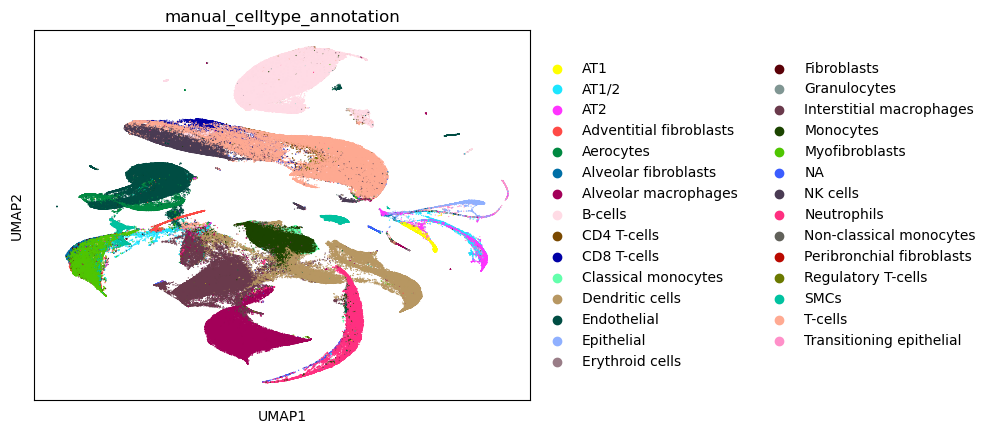

In [6]:
sc.pl.umap(adata, color=["manual_celltype_annotation"], size=3)

# Celltypist

In [7]:
alignment = celltypist.harmonize(adata, 'dataset', 'manual_celltype_annotation')

👀 Detected PCA coordinates in the object, will use these to calculate distances
🏆 Reordering datasets
🖇 Harmonizing cell types of misharin and tsukui
🖇 Harmonizing cell types of xie
🖇 Harmonizing cell types of schiller
🖇 Harmonizing cell types of peyser
🖇 Harmonizing cell types of galapagos_rad
🖇 Harmonizing cell types of galapagos_bleo
🖋️ Reannotating cells
✅ Harmonization done!


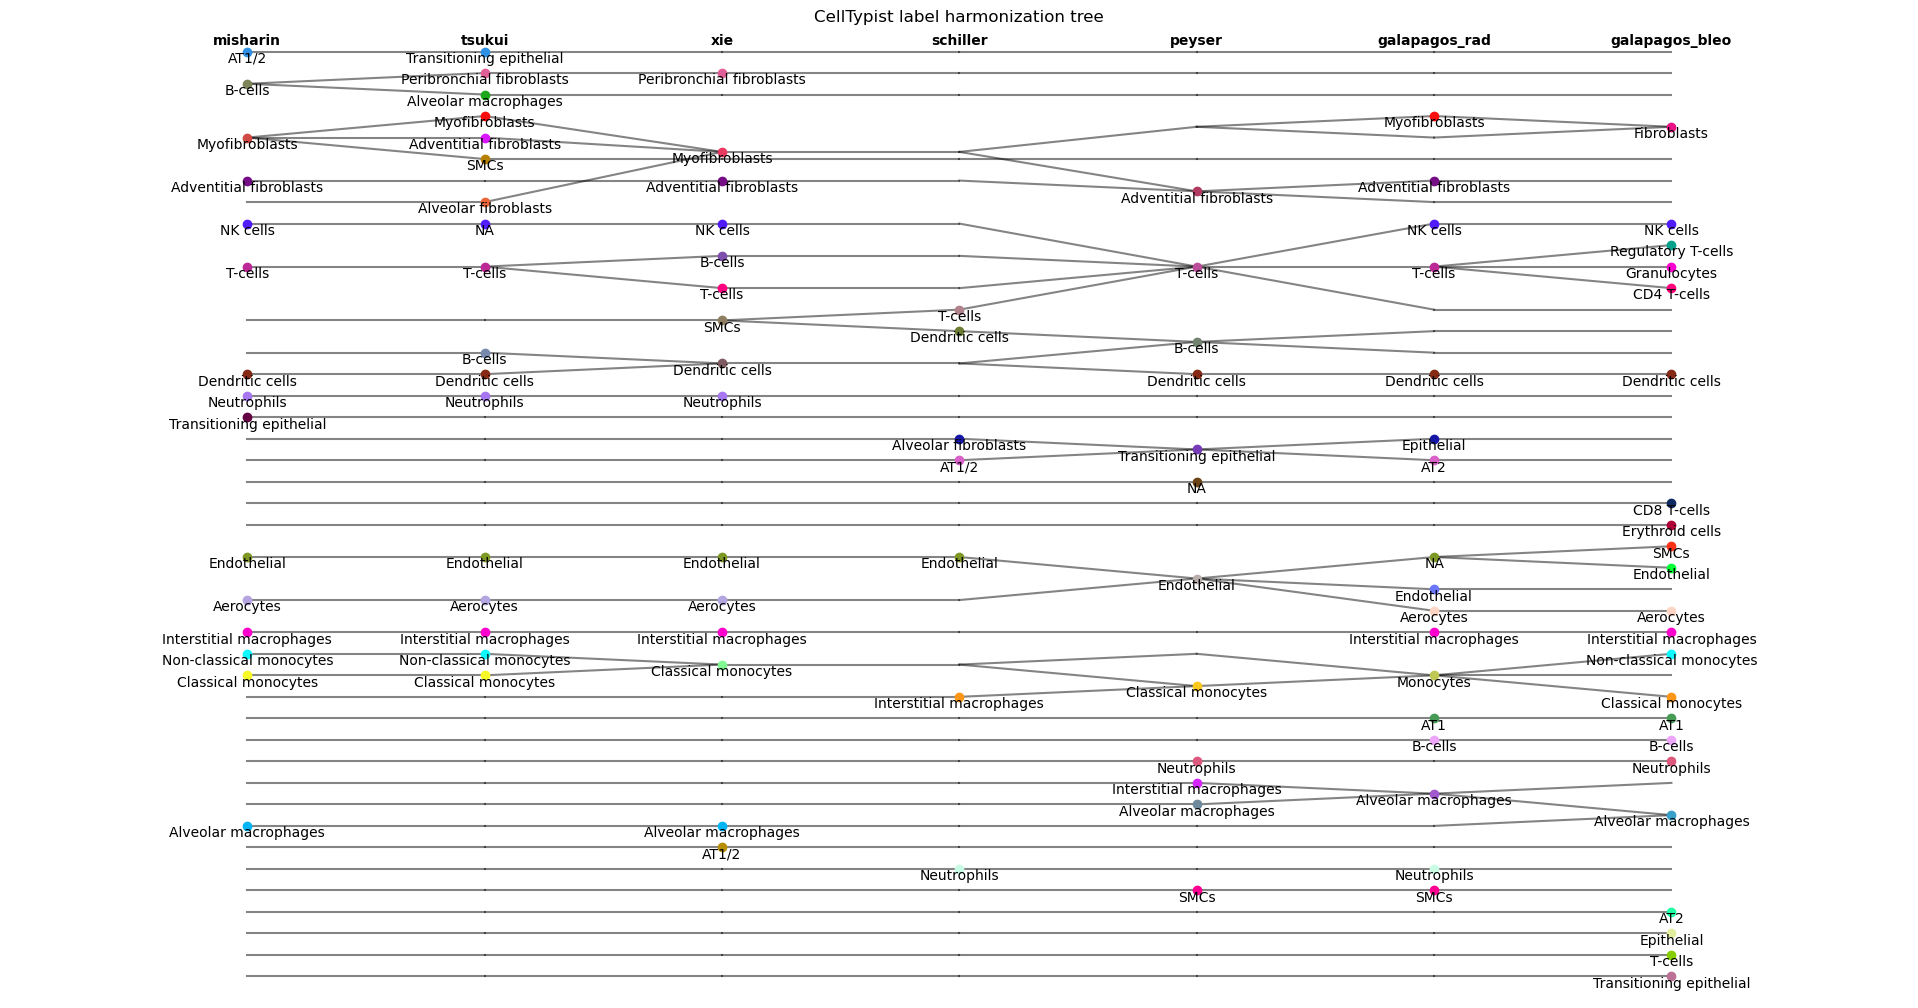

In [8]:
celltypist.treeplot(alignment)

In [9]:
alignment.write('/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/all_datasets_merged/celltypist_alignment_on_all_data.pkl')